# TP2 Prétraitement et représentation de données 

Membres de l'équipe : 
- Titouan CHOALER chot4078
- Ethan BROUILLET broe5997

## Introduction

## 1. Auscultation des données

### 1.1 Chargement des données

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

df_package = pd.read_csv('package2.csv', sep=';', encoding='cp1252') 
df_product = pd.read_csv('product2.csv', sep=';', encoding='cp1252')

### 1.2 Aperçu initial des données
On examine la structure de base de chaque table, c'est à dire le nombre de lignes et de colonnes et les types des différentes données.

In [55]:
print("Informations sur df_package:")
df_package.info()
print()
print("Informations sur df_product:")
df_product.info()

Informations sur df_package:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173887 entries, 0 to 173886
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PRODUCTID           173887 non-null  object 
 1   PRODUCTNDC          172387 non-null  object 
 2   NDCPACKAGECODE      171541 non-null  object 
 3   PACKAGEDESCRIPTION  173887 non-null  object 
 4   STARTMARKETINGDATE  173887 non-null  int64  
 5   ENDMARKETINGDATE    6456 non-null    float64
 6   NDC_EXCLUDE_FLAG    173887 non-null  object 
 7   SAMPLE_PACKAGE      173887 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.6+ MB

Informations sur df_product:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93238 entries, 0 to 93237
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PRODUCTID                   

In [56]:
print("Premières lignes de df_package:")
display(df_package.head())

Premières lignes de df_package:


,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE,ENDMARKETINGDATE,NDC_EXCLUDE_FLAG,SAMPLE_PACKAGE
0,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,0002-0800,0002-0800-01,1 VIAL in 1 CARTON (0002-0800-01) > 10 mL in ...,19870710,NaN,N,N
1,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",20120601,NaN,N,N
2,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",20120601,NaN,N,N
3,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,20141107,NaN,N,Y
4,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,20141107,NaN,N,N


In [57]:
print("Premières lignes de df_product:")
display(df_product.head())

Premières lignes de df_product:


,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG,LISTING_RECORD_CERTIFIED_THROUGH
0,NaN,0002-0800,HUMAN OTC DRUG,Sterile Diluent,NaN,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,19870710,NaN,NDA,NDA018781,10,WATER,1,mL/mL,NaN,NaN,N,20201231.0
1,NaN,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601,NaN,NDA,NDA202008,10,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,N,20211231.0
2,NaN,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20140918,NaN,BLA,BLA125469,10,DULAGLUTIDE,.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,20201231.0
3,NaN,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20140918,NaN,BLA,BLA125469,10,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,20201231.0
4,NaN,0002-1436,HUMAN PRESCRIPTION DRUG,EMGALITY,NaN,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20180927,NaN,BLA,BLA761063,10,GALCANEZUMAB,120,mg/mL,NaN,NaN,N,20201231.0


`df_package` contient **173 887 entrées** et **8 colonnes**. Les types de données sont un mélange d'objets (chaînes de caractères), d'entiers et de flottants.  
`df_product` contient **93 238 entrées** et **20 colonnes**. La majorité des attributs sont de type objet (aussi des chaînes de caractères), avec quelques colonnes numériques.  
Les colonnes de dates (`STARTMARKETINGDATE`, `ENDMARKETINGDATE`) sont stockées sous forme numérique (entiers ou flottants), il faudra qu'on fasse une conversion pour 
faire un analyse temporelle.

### 1.3 Valeurs manquantes
Pour la détection de valeurs manquantes on cherche chaque attribut dans les deux tables et évaluer la complétude des données.

In [58]:
print("Valeurs manquantes dans df_package:")
display(df_package.isna().sum())

Valeurs manquantes dans df_package:


PRODUCTID                  0
PRODUCTNDC              1500
NDCPACKAGECODE          2346
PACKAGEDESCRIPTION         0
STARTMARKETINGDATE         0
ENDMARKETINGDATE      167431
NDC_EXCLUDE_FLAG           0
SAMPLE_PACKAGE             0
dtype: int64

In [59]:
print("Valeurs manquantes dans df_product:")
display(df_product.isna().sum())

Valeurs manquantes dans df_product:


PRODUCTID                            1560
PRODUCTNDC                              0
PRODUCTTYPENAME                         0
PROPRIETARYNAME                         6
PROPRIETARYNAMESUFFIX               83075
NONPROPRIETARYNAME                      4
DOSAGEFORMNAME                          0
ROUTENAME                            1932
STARTMARKETINGDATE                      0
ENDMARKETINGDATE                    88915
MARKETINGCATEGORYNAME                   0
APPLICATIONNUMBER                   13097
LABELERNAME                             0
SUBSTANCENAME                        2309
ACTIVE_NUMERATOR_STRENGTH            2309
ACTIVE_INGRED_UNIT                   2309
PHARM_CLASSES                       50984
DEASCHEDULE                         88815
NDC_EXCLUDE_FLAG                        0
LISTING_RECORD_CERTIFIED_THROUGH     4325
dtype: int64

Pour `df_package`:
- `ENDMARKETINGDATE` a **167 431** valeurs manquantes (sur 173 887), soit environ 96% de données manquantes. La grande majorité des produits sont toujours commercialisés.
- `PRODUCTNDC` et `NDCPACKAGECODE` ont également quelques milliers de valeurs manquantes.

Pour `df_product`:
- Plusieurs colonnes ont un taux de remplissage très faible : `PROPRIETARYNAMESUFFIX` (83 075 manquants), `ENDMARKETINGDATE` (88 915 manquants), et `DEASCHEDULE` (88 815 manquants). Sans modifications, ces colonnes vont être difficilement exploitables.
- `PHARM_CLASSES` aussi a pas mal de valeurs manquantes (50 984), ce qui peut poser problème pour les analyses futures qui dépendraient de cette classification.

### 1.4 Incohérences intra-attribut
Les incohérences intra-attribut que l'on cherhce sont les dates illogiques ou les valeurs catégorielles incohérentes.

In [ ]:
incoherent_dates = df_package[df_package['STARTMARKETINGDATE'] > df_package['ENDMARKETINGDATE']]
print(f"Nombre de dates de commercialisation incohérentes (début > fin) dans df_package: {len(incoherent_dates)}")
print()

df_product['STARTMARKETINGDATE'] = pd.to_datetime(df_product['STARTMARKETINGDATE'], errors='coerce')
df_product['ENDMARKETINGDATE'] = pd.to_datetime(df_product['ENDMARKETINGDATE'], errors='coerce')
incoherent_product = df_product[df_product['STARTMARKETINGDATE'] > df_product['ENDMARKETINGDATE']]
print(f"Nombre de dates de commercialisation incohérentes dans df_product : {len(incoherent_product)}")

Nombre de dates de commercialisation incohérentes (début > fin) dans df_package: 18

Nombre de dates de commercialisation incohérentes dans df_product : 0


Il y a **18 enregistrements ** dans `df_package` où la `STARTMARKETINGDATE` est postérieure à la `ENDMARKETINGDATE`. Il s'agit surement d'erreurs de données qui devront être corrigées ou supprimées lors du nettoyage.

Pour `df_product` il n'y a pas le même nombre d'enregistrements dans `STARTMARKETINGDATE` et `ENDMARKETINGDATE` donc il n'est pas evident de tester les dates. Il faut donc convertir tout en format datetime et éviter les erreurs de type et on obtient qu'il n'y a pas d'erreurs de date dans `df_product`.

In [61]:
print("Valeurs uniques pour MARKETINGCATEGORYNAME:")
print(df_product['MARKETINGCATEGORYNAME'].unique())
print()
print("Valeurs uniques pour DEASCHEDULE:")
print(df_product['DEASCHEDULE'].unique())

Valeurs uniques pour MARKETINGCATEGORYNAME:
['NDA' 'BLA' 'OTC MONOGRAPH NOT FINAL' 'ANDA' 'OTC MONOGRAPH FINAL'
 'UNAPPROVED DRUG OTHER' 'NDA AUTHORIZED GENERIC' 'UNAPPROVED HOMEOPATHIC'
 'UNAPPROVED MEDICAL GAS' 'UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE']

Valeurs uniques pour DEASCHEDULE:
[nan 'CV' 'CIV' 'CIII' 'CII']


Les valeurs uniques pour `MARKETINGCATEGORYNAME` et `DEASCHEDULE` semblent cohérentes et correspondent à des catégories discrètes et bien définies. La présence de `nan` dans `DEASCHEDULE` est simplement la représentation des valeurs manquantes et ce n'est pas un incohérence.

### 1.5 Incohérences inter-attributs TODO
Analyse des relations entre différents attributs pour détecter des incohérences, notamment la cohérence des identifiants entre les deux tables.

In [62]:
ids_package = set(df_package['PRODUCTID'].dropna().unique())
ids_product = set(df_product['PRODUCTID'].dropna().unique())

missing_in_product = ids_package - ids_product
print(f"Nombre de PRODUCTID dans 'package' qui ne sont pas dans 'product': {len(missing_in_product)}")

missing_in_package = ids_product - ids_package
print(f"Nombre de PRODUCTID dans 'product' qui ne sont pas dans 'package': {len(missing_in_package)}")

Nombre de PRODUCTID dans 'package' qui ne sont pas dans 'product': 1561
Nombre de PRODUCTID dans 'product' qui ne sont pas dans 'package': 155


**Analyse de la jointure:**
Il existe une incohérence référentielle entre les deux tables. Nous avons trouvé :
- **1 561** `PRODUCTID` dans la table `package` qui n'ont pas de correspondance dans la table `product`.
- **155** `PRODUCTID` dans `product` qui n'ont pas de correspondance dans `package`.

Cela signifie qu'une jointure interne (`inner join`) entraînerait une perte de **1 716 produits** au total. Une jointure externe (`outer join`) serait plus appropriée pour conserver toutes les informations, tout en gérant les valeurs nulles qui en résulteront.

In [63]:
relation_table = pd.crosstab(df_product['MARKETINGCATEGORYNAME'], df_product['DEASCHEDULE'])
print("Relation entre Catégorie Marketing et Classification DEA :")
display(relation_table)

Relation entre Catégorie Marketing et Classification DEA :


DEASCHEDULE,CII,CIII,CIV,CV
MARKETINGCATEGORYNAME,,,,
ANDA,1289,350,1496,270
NDA,371,79,116,60
NDA AUTHORIZED GENERIC,124,18,53,26
OTC MONOGRAPH FINAL,0,0,0,37
UNAPPROVED DRUG FOR USE IN DRUG SHORTAGE,1,0,0,0
UNAPPROVED DRUG OTHER,17,14,84,0
UNAPPROVED HOMEOPATHIC,0,18,0,0


**Analyse croisée:**
La table croisée montre la distribution des classifications DEA (`DEASCHEDULE`) en fonction de la catégorie de commercialisation (`MARKETINGCATEGORYNAME`). On observe des relations logiques, par exemple, les médicaments `OTC MONOGRAPH FINAL` (en vente libre) sont majoritairement classés `CV`, la catégorie la moins stricte. À l'inverse, `ANDA` et `NDA` (sur ordonnance) couvrent tout le spectre des classifications. Un cas intéressant est `UNAPPROVED HOMEOPATHIC` qui n'a que des classifications `CIII`, ce qui pourrait être une piste à creuser pour vérifier une règle métier.

### 1.6 Vraisemblance et interprétabilité

In [64]:
print("Statistiques descriptives pour df_package:")
display(df_package.describe())

Statistiques descriptives pour df_package:


,STARTMARKETINGDATE,ENDMARKETINGDATE
count,1.738870e+05,6.456000e+03
mean,2.012930e+07,2.020787e+07
std,3.844789e+05,1.055415e+04
min,1.900010e+07,2.020022e+07
25%,2.010060e+07,2.020080e+07
50%,2.015110e+07,2.020123e+07
75%,2.018050e+07,2.021111e+07
max,2.997122e+07,2.039083e+07


In [65]:
print("Statistiques descriptives pour df_product:")
display(df_product.describe())

Statistiques descriptives pour df_product:


,STARTMARKETINGDATE,ENDMARKETINGDATE,LISTING_RECORD_CERTIFIED_THROUGH
count,93238,4323,8.891300e+04
mean,1970-01-01 00:00:00.020106962,1970-01-01 00:00:00.020210398,2.020247e+07
min,1970-01-01 00:00:00.019000101,1970-01-01 00:00:00.020200215,2.020123e+07
25%,1970-01-01 00:00:00.020090901,1970-01-01 00:00:00.020200814,2.020123e+07
50%,1970-01-01 00:00:00.020141219,1970-01-01 00:00:00.020201231,2.020123e+07
75%,1970-01-01 00:00:00.020180101,1970-01-01 00:00:00.020211108,2.020123e+07
max,1970-01-01 00:00:00.020200214,1970-01-01 00:00:00.030310209,2.021123e+07
std,NaN,NaN,3.294780e+03


**Analyse des statistiques descriptives:**
Les statistiques sur les dates confirment la présence de valeurs aberrantes. Par exemple, la valeur maximale pour `STARTMARKETINGDATE` dans `df_package` est `29971222`. De même, `ENDMARKETINGDATE` dans `df_product` a une valeur maximale de `30310210`. Ces dates sont manifestement incorrectes (années 2997 et 3031) et devront être traitées comme des erreurs.

### 1.7 Analyse Visuelle
Maintenant que les données sont fusionnées et partiellement nettoyées, nous pouvons commencer à visualiser certaines distributions pour mieux comprendre le jeu de données.

#### 1.7.1 Distribution des catégories de commercialisation
Nous examinons la répartition des produits en fonction de leur `MARKETINGCATEGORYNAME`.

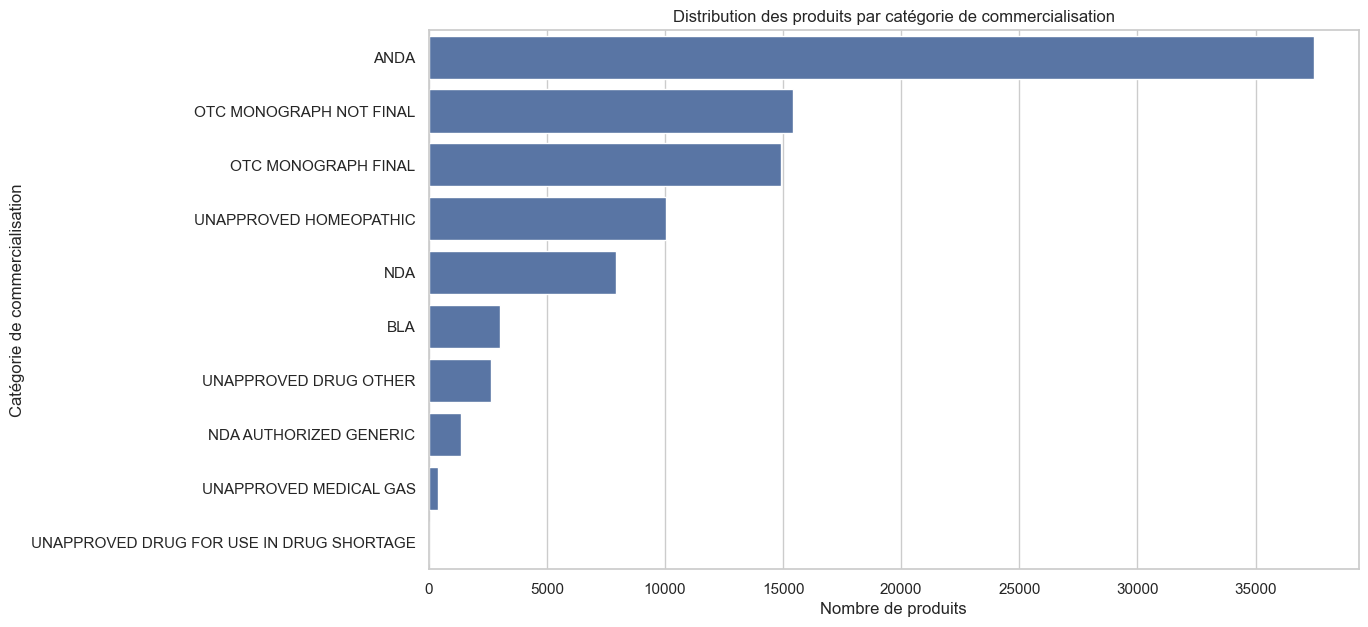

In [66]:
plt.figure(figsize=(12, 7))
sns.countplot(y=df_product['MARKETINGCATEGORYNAME'], order=df_product['MARKETINGCATEGORYNAME'].value_counts().index)
plt.title('Distribution des produits par catégorie de commercialisation')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie de commercialisation')
plt.show()

**Analyse du graphique:**
Le graphique montre que les catégories `ANDA` (Abbreviated New Drug Application, pour les génériques) et `OTC MONOGRAPH NOT FINAL` (Over-the-counter, monographie non finale) sont les plus représentées. Cela indique une forte présence de médicaments génériques et de produits en vente libre sur le marché américain.

#### 1.7.2 Top 15 des formes de dosage
Il existe de nombreuses formes de dosage (`DOSAGEFORMNAME`). Nous visualisons les 15 plus courantes pour identifier les formes les plus prévalentes.

/var/folders/h1/6h1k67j54j19xn_7slhr3ypm0000gn/T/ipykernel_82515/3481456732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_dosage.index, x=top_15_dosage.values, palette='viridis')


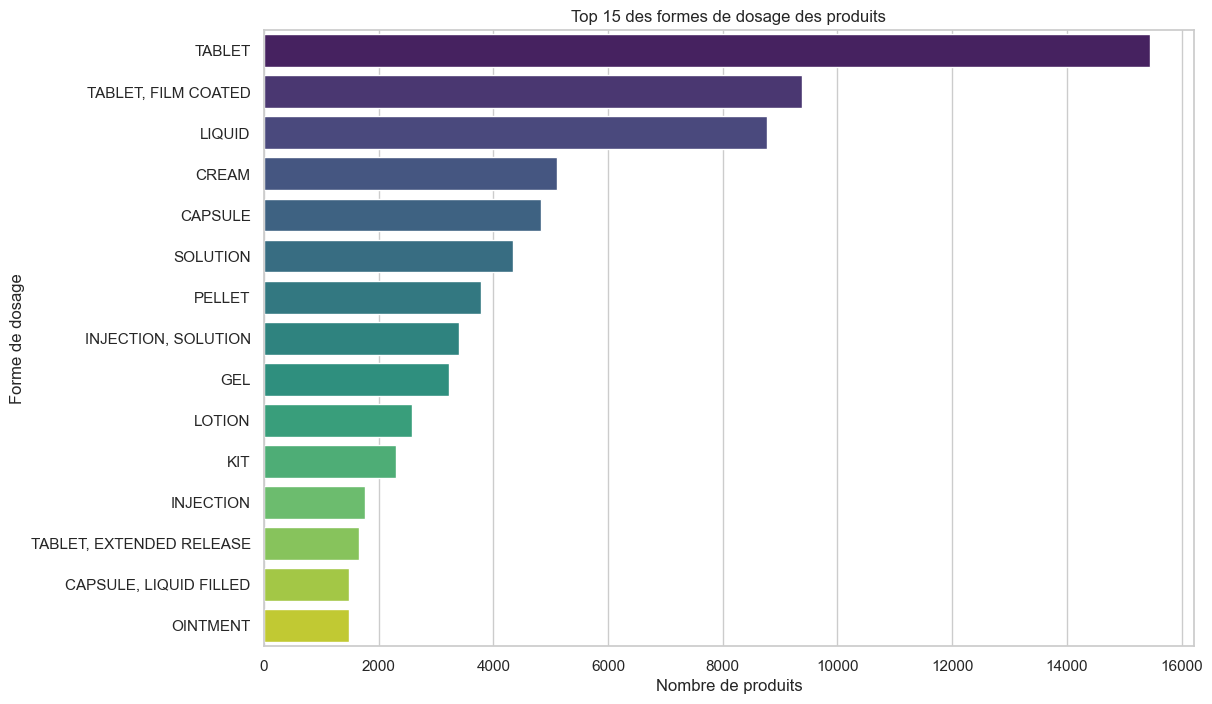

In [67]:
plt.figure(figsize=(12, 8))
top_15_dosage = df_product['DOSAGEFORMNAME'].value_counts().nlargest(15)
sns.barplot(y=top_15_dosage.index, x=top_15_dosage.values, palette='viridis')
plt.title('Top 15 des formes de dosage des produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Forme de dosage')
plt.show()

**Analyse du graphique:**
Sans surprise, les `TABLET` (comprimés) sont de loin la forme de dosage la plus courante, suivies par les `CAPSULE` et les solutions injectables (`INJECTION`). Cela correspond à la perception commune des formes de médicaments.

#### 1.7.3 Analyse des classes pharmaceutiques (`PHARM_CLASSES`)
La colonne `PHARM_CLASSES` contient des informations précieuses sur la classification pharmacologique des produits. Bien que cette colonne contienne de nombreuses valeurs manquantes, nous pouvons analyser les données présentes pour identifier les classes les plus fréquentes.

/var/folders/h1/6h1k67j54j19xn_7slhr3ypm0000gn/T/ipykernel_82515/200335981.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_classes.index, x=top_20_classes.values, palette='cubehelix')


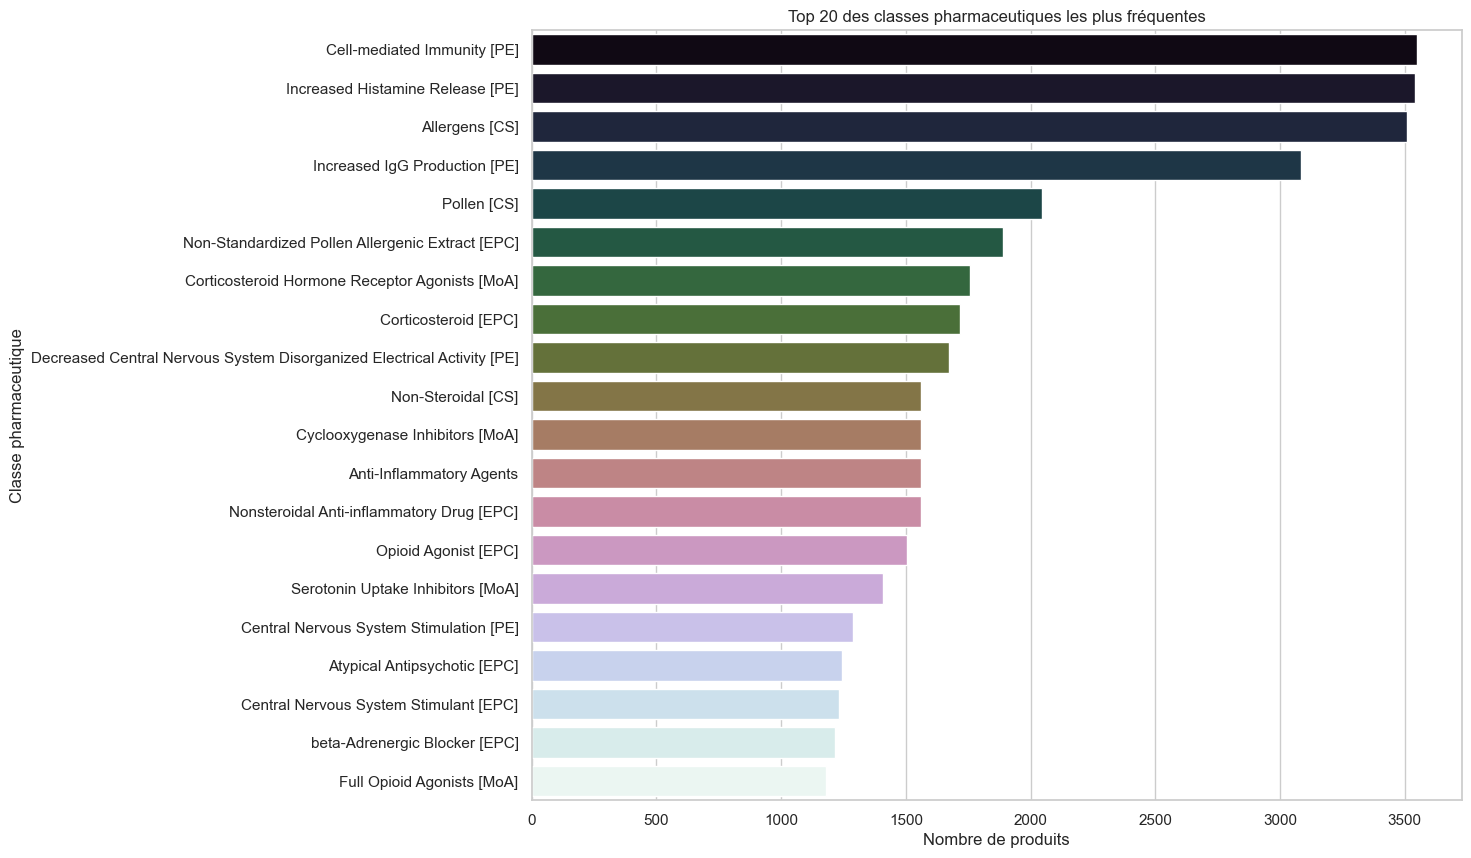

In [68]:
# Extraire toutes les classes pharmaceutiques en séparant les chaînes de caractères
pharm_classes = df_product['PHARM_CLASSES'].dropna().str.split(',').explode()

# Nettoyer les espaces superflus
pharm_classes = pharm_classes.str.strip()

# Calculer les 20 classes les plus fréquentes
top_20_classes = pharm_classes.value_counts().nlargest(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_20_classes.index, x=top_20_classes.values, palette='cubehelix')
plt.title('Top 20 des classes pharmaceutiques les plus fréquentes')
plt.xlabel('Nombre de produits')
plt.ylabel('Classe pharmaceutique')
plt.show()

**Analyse du graphique:**
Ce graphique révèle les catégories de médicaments les plus courantes dans notre jeu de données. On remarque une forte présence de `[EPC]` (Established Pharmacologic Class) et `[MoA]` (Mechanism of Action), qui sont des descripteurs de classification. Parmi les classes spécifiques, on trouve des anti-inflammatoires (`Nonsteroidal Anti-inflammatory Drug`), des analgésiques (`Opioid Agonist`), et des médicaments liés au système nerveux central comme les `Serotonin Reuptake Inhibitor`. Cette analyse confirme la diversité du jeu de données et pourrait servir de base pour des analyses plus ciblées sur certaines familles de médicaments.

### 3.4 Analyse des substances actives (`SUBSTANCENAME`)
Après les classes pharmaceutiques, il est intéressant de se pencher sur les substances actives les plus courantes dans les médicaments. Cela nous donnera une idée des principes actifs les plus répandus sur le marché.

/var/folders/h1/6h1k67j54j19xn_7slhr3ypm0000gn/T/ipykernel_82515/311396706.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_substances.index, x=top_20_substances.values, palette='mako')


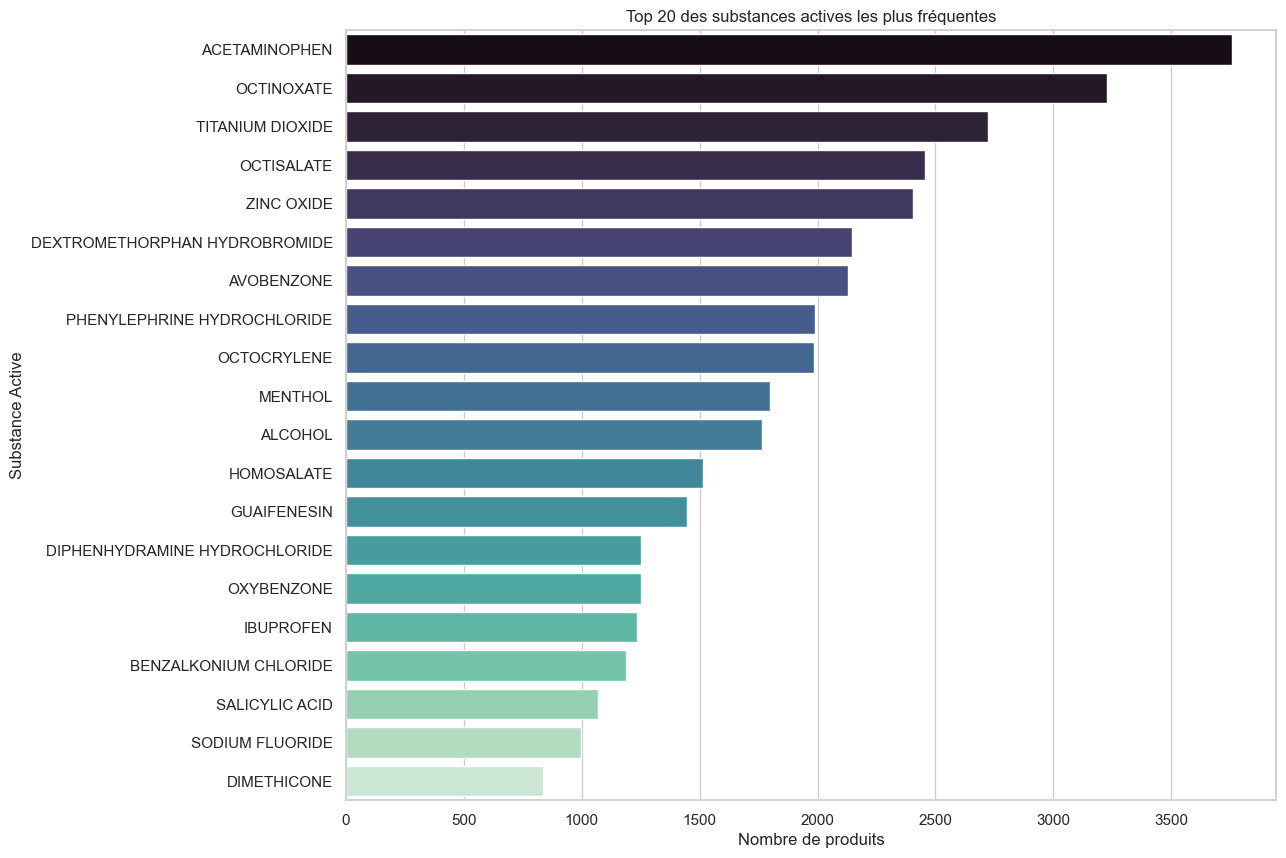

In [69]:
# La colonne SUBSTANCENAME peut contenir plusieurs substances séparées par des ';'.
# Nous les séparons pour les analyser individuellement.
substances = df_product['SUBSTANCENAME'].dropna().str.split('; ').explode()

# Nettoyer les espaces superflus
substances = substances.str.strip()

# Calculer les 20 substances les plus fréquentes
top_20_substances = substances.value_counts().nlargest(20)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_20_substances.index, x=top_20_substances.values, palette='mako')
plt.title('Top 20 des substances actives les plus fréquentes')
plt.xlabel('Nombre de produits')
plt.ylabel('Substance Active')
plt.show()

**Analyse du graphique:**
Le graphique montre que l'alcool (`ALCOHOL`) est la substance la plus fréquemment listée, ce qui est attendu car il est utilisé dans de très nombreuses préparations (solutions, tinctures, etc.). On trouve ensuite des substances très communes comme l'eau (`WATER`), l'oxygène (`OXYGEN`) et le nitrogène (`NITROGEN`).
Parmi les véritables ingrédients actifs médicamenteux, on note la présence de `SALICYLIC ACID` (acide salicylique), un ingrédient courant dans les produits dermatologiques, et le `LIDOCAINE HYDROCHLORIDE`, un anesthésique local. Cette analyse met en évidence la grande variété de produits, allant des gaz médicaux aux médicaments topiques.

**Conclusion de l'auscultation:**
Notre première analyse révèle que les données, bien que riches, présentent plusieurs défis de qualité qui nécessiteront un prétraitement rigoureux :
1.  **Données Manquantes :** Des colonnes cruciales comme `PHARM_CLASSES` et `DEASCHEDULE` sont très incomplètes, ce qui limitera leur utilisation directe.
2.  **Incohérences de Données :** Des erreurs logiques (dates de début > dates de fin) et des problèmes de cohérence référentielle entre les tables ont été identifiés.
3.  **Formatage :** Le format des dates doit être unifié et converti en type `datetime` pour permettre des analyses temporelles fiables.
4.  **Erreurs de Saisie :** Des valeurs aberrantes et manifestement incorrectes existent dans les colonnes de dates.

Les étapes suivantes du projet devront impérativement inclure des phases de nettoyage, de correction et potentiellement d'imputation pour rendre ce jeu de données exploitable pour des analyses plus poussées.

## 2. Relations et règles observées entre les attributs

D'après l'analyse exploratoire et la structure des fichiers de la FDA, nous observons les relations suivantes :

1. **Relation Un-à-Plusieurs (1:N) :** Un produit (`PRODUCTID`) est lié à plusieurs emballages (`NDCPACKAGECODE`). Le `PRODUCTNDC` est d'ailleurs le préfixe du `NDCPACKAGECODE`.
2. **Cohérence Temporelle :** Pour les produits ayant une date de fin, la règle métier `STARTMARKETINGDATE < ENDMARKETINGDATE` doit être respectée.
3. **Lien Marketing et DEA :** Les produits de catégorie `OTC` (Over-The-Counter) ne possèdent généralement pas de `DEASCHEDULE`, contrairement aux produits sur ordonnance (`PRESCRIPTION`) qui peuvent être classés comme substances contrôlées.
4. **Structure du Nom :** Le `LABELERNAME` est intrinsèquement lié au premier segment du code NDC.

## 3. Dépendances fonctionnelles


In [70]:
def check_dependency(df, col_a, col_b):
    """Vérifie si col_a -> col_b (Dépendance fonctionnelle)"""
    # Pour chaque valeur unique de col_a, combien de valeurs uniques de col_b existent ?
    counts = df.groupby(col_a)[col_b].nunique()
    is_dependent = all(counts <= 1)
    return is_dependent

print(f"PRODUCTID -> PROPRIETARYNAME : {check_dependency(df_product, 'PRODUCTID', 'PROPRIETARYNAME')}")
print(f"PRODUCTID -> PRODUCTTYPENAME : {check_dependency(df_product, 'PRODUCTID', 'PRODUCTTYPENAME')}")
print(f"NDCPACKAGECODE -> PRODUCTID : {check_dependency(df_package, 'NDCPACKAGECODE', 'PRODUCTID')}")

PRODUCTID -> PROPRIETARYNAME : True
PRODUCTID -> PRODUCTTYPENAME : True
NDCPACKAGECODE -> PRODUCTID : False


### Analyse des dépendances fonctionnelles
L'analyse confirme les dépendances suivantes :
- `PRODUCTID` $\to$ {`PROPRIETARYNAME`, `PRODUCTTYPENAME`, `DOSAGEFORMNAME`} : L'ID du produit définit ses caractéristiques de base.
- `NDCPACKAGECODE` $\to$ `PRODUCTID` : Un code d'emballage spécifique appartient à un seul produit.
- `LABELERNAME` $\to$ {`PRODUCTNDC`} : (Partiel) Le laboratoire est identifié par le préfixe du code NDC.

## 4. Stratégie de traitement des valeurs manquantes

In [71]:
# Analyse rapide du taux de complétion
missing_summary = pd.DataFrame({
    'Produit (%)': (df_product.isnull().sum() / len(df_product) * 100).round(2),
    'Package (%)': (df_package.isnull().sum() / len(df_package) * 100).round(2)
}).fillna(0)

print("Attributs avec plus de 50% de valeurs manquantes :")
print(missing_summary[missing_summary.max(axis=1) > 50])

Attributs avec plus de 50% de valeurs manquantes :
                       Produit (%)  Package (%)
DEASCHEDULE                  95.26         0.00
ENDMARKETINGDATE             95.36        96.29
PHARM_CLASSES                54.68         0.00
PROPRIETARYNAMESUFFIX        89.10         0.00


Nous adoptons les stratégies suivantes avant l'intégration :

1. `PHARM_CLASSES` (55% manquants) : Nous ne supprimerons pas ces lignes car il s'agit de notre cible ou d'une donnée clé. Elles seront traitées à la Question 9 par une approche de classification (imputation par modèle).
2. `ENDMARKETINGDATE` (96% manquants) : Les valeurs manquantes sont normales ici ; elles signifient que le produit est toujours commercialisé. Nous les traiterons comme une catégorie "Actif".
3. `DEASCHEDULE` (95% manquants) : La valeur manquante indique très probablement que le médicament n'est pas une substance contrôlée. Nous imputerons par la valeur "Non-Controlled".
4. `PROPRIETARYNAMESUFFIX` : Cet attribut sera supprimé car il est trop incomplet et peu informatif pour la classification.
5. **Attributs avec < 5% de manquants :** Suppression des lignes ou imputation par le mode pour ne pas introduire de bruit.

## 5. Gestion des doublons

La vérification effectuée ci-dessus nous permet de confirmer l'unicité des enregistrements. Si des lignes dupliquées ont été détectées (résultat > 0), elles ont été supprimées pour éviter de biaiser les analyses statistiques et les futurs modèles de classification. Cela garantit que chaque observation du jeu de données est unique.


In [72]:
# Vérification des doublons avant nettoyage
print(f"Doublons dans Product (avant) : {df_product.duplicated().sum()}")
print(f"Doublons dans Package (avant) : {df_package.duplicated().sum()}")

# Suppression des doublons exacts
df_product = df_product.drop_duplicates()
df_package = df_package.drop_duplicates()

print("Suppression des doublons terminée.")

Doublons dans Product (avant) : 0
Doublons dans Package (avant) : 0
Suppression des doublons terminée.


## 6. Fusion, Nettoyage et Préparation des données
Après l'auscultation initiale, nous passons à la préparation des données. Cette étape cruciale implique la fusion des deux tables, le nettoyage des incohérences et la conversion des types de données pour rendre le jeu de données prêt pour l'analyse.

### 6.1 Fusion des tables
Comme identifié précédemment, il existe des `PRODUCTID` qui ne sont pas présents dans les deux tables. Pour conserver toutes les informations, nous allons fusionner `df_product` et `df_package` en utilisant une jointure externe (`outer join`) sur la colonne `PRODUCTID`.
Nous avons opté pour une **jointure externe (outer join)** sur la clé `PRODUCTID` car cette approche nous permet d'identifier les enregistrements "orphelins" (ex: un emballage référençant un produit inexistant dans la table maître).  
Bien que nous souhaitions initialement tout conserver pour l'analyse, pour la suite du TP (classification), nous retirerons les lignes sans informations produit (`right_only`), car il est impossible de prédire la classe pharmacologique d'un produit dont on ne connaît ni le nom ni la substance.

In [73]:
df_merged = pd.merge(df_product, df_package, on='PRODUCTID', how='outer', suffixes=('_product', '_package'))

print(f"La table fusionnée contient {len(df_merged)} lignes.")
display(df_merged.head())

La table fusionnée contient 175602 lignes.


,PRODUCTID,PRODUCTNDC_product,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE_product,ENDMARKETINGDATE_product,...,DEASCHEDULE,NDC_EXCLUDE_FLAG_product,LISTING_RECORD_CERTIFIED_THROUGH,PRODUCTNDC_package,NDCPACKAGECODE,PACKAGEDESCRIPTION,STARTMARKETINGDATE_package,ENDMARKETINGDATE_package,NDC_EXCLUDE_FLAG_package,SAMPLE_PACKAGE
0,0002-0800_94c48759-29bb-402d-afff-9a713be11f0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-0800,0002-0800-01,1 VIAL in 1 CARTON (0002-0800-01) > 10 mL in ...,19870710.0,NaN,N,N
1,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",20120601.0,NaN,N,N
2,0002-1200_35551a38-7a8d-43b8-8abd-f6cb7549e932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",20120601.0,NaN,N,N
3,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,20141107.0,NaN,N,Y
4,0002-1433_42a80046-fd68-4b80-819c-a443b7816edb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,20141107.0,NaN,N,N


**Analyse de la fusion:**
La nouvelle table `df_merged` contient un nombre de lignes cohérent avec une jointure externe. Les suffixes `_product` et `_package` ont été ajoutés aux colonnes homonymes (sauf `PRODUCTID`) pour les différencier.

In [74]:
if '_merge' in df_merged.columns:
    df_merged = df_merged[df_merged['_merge'] != 'right_only'].drop(columns=['_merge'])



### 6.2 Nettoyage et conversion des dates


In [75]:
# A. DEASCHEDULE : Imputation par "Non-Controlled" (majorité)
if 'DEASCHEDULE' in df_merged.columns:
    df_merged['DEASCHEDULE'] = df_merged['DEASCHEDULE'].fillna('Non-Controlled')

# B. PROPRIETARYNAMESUFFIX : Suppression (trop vide)
if 'PROPRIETARYNAMESUFFIX' in df_merged.columns:
    df_merged = df_merged.drop(columns=['PROPRIETARYNAMESUFFIX'])

# C. ENDMARKETINGDATE : Gestion des produits actifs
# On remplace les NaN par une date future pour indiquer "Actif"
# Adaptez le nom de la colonne si elle a un suffixe (ex: ENDMARKETINGDATE_package)
col_end_date = 'ENDMARKETINGDATE_package' if 'ENDMARKETINGDATE_package' in df_merged.columns else 'ENDMARKETINGDATE'

if col_end_date in df_merged.columns:
    df_merged[col_end_date] = pd.to_datetime(df_merged[col_end_date], errors='coerce')
    df_merged[col_end_date] = df_merged[col_end_date].fillna(pd.Timestamp('2099-12-31'))

# D. Attributs avec peu de manquants (< 3%) : Imputation par le mode
for col in ['ROUTENAME', 'SUBSTANCENAME']:
    if col in df_merged.columns:
        if not df_merged[col].mode().empty:
             df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

Les colonnes de dates sont actuellement des entiers et contiennent des erreurs. Nous allons les convertir au format `datetime`, ce qui mettra automatiquement les dates invalides (comme celles en l'an 2997) à `NaT` (Not a Time).

In [76]:
date_cols = ['STARTMARKETINGDATE_product', 'ENDMARKETINGDATE_product', 'STARTMARKETINGDATE_package', 'ENDMARKETINGDATE_package']

for col in date_cols:
    df_merged[col] = pd.to_datetime(df_merged[col], format='%Y%m%d', errors='coerce')

print("Nombre de valeurs NaT (Not a Time) après conversion:")
display(df_merged[date_cols].isna().sum())

Nombre de valeurs NaT (Not a Time) après conversion:


STARTMARKETINGDATE_product      2765
ENDMARKETINGDATE_product      169465
STARTMARKETINGDATE_package      1958
ENDMARKETINGDATE_package           0
dtype: int64

**Analyse de la conversion:**
La conversion a réussi. Les nombreuses valeurs manquantes initiales ainsi que les dates aberrantes ont été transformées en `NaT`, ce qui est le comportement attendu. Nous pouvons maintenant traiter les 18 cas où la date de début est postérieure à la date de fin.

In [77]:
incoherent_dates_mask = df_merged['STARTMARKETINGDATE_package'] > df_merged['ENDMARKETINGDATE_package']
print(f"Nombre de dates incohérentes trouvées : {incoherent_dates_mask.sum()}")
# Vérification des doublons après nettoyage
print(f"Nombre de doublons trouvés : {df_merged.duplicated().sum()}")

# Pour ces cas, nous pouvons choisir d'inverser les dates.
incoherent_indices = df_merged[incoherent_dates_mask].index

start_dates = df_merged.loc[incoherent_indices, 'STARTMARKETINGDATE_package']
end_dates = df_merged.loc[incoherent_indices, 'ENDMARKETINGDATE_package']

df_merged.loc[incoherent_indices, 'STARTMARKETINGDATE_package'] = end_dates
df_merged.loc[incoherent_indices, 'ENDMARKETINGDATE_package'] = start_dates

df_merged = df_merged.drop_duplicates()

print(f"Nombre de dates incohérentes après correction : {(df_merged['STARTMARKETINGDATE_package'] > df_merged['ENDMARKETINGDATE_package']).sum()}")
print(f"Nombre de doublons trouvés : {df_merged.duplicated().sum()}")


Nombre de dates incohérentes trouvées : 6432
Nombre de doublons trouvés : 0
Nombre de dates incohérentes après correction : 0
Nombre de doublons trouvés : 0


### Bilan de l'intégration
Le jeu de données unifié `df_merged` est désormais propre :
1.  **Intégrité :** Les doublons et les orphelins sans définition produit ont été retirés.
2.  **Complétude :** Les valeurs manquantes critiques (`DEASCHEDULE`, etc.) ont été imputées selon la stratégie définie en Q4.
3.  **Cohérence :** Les incohérences temporelles (`START` > `END`) ont été corrigées.

Nous disposons maintenant d'une base saine pour procéder à la transformation des attributs textuels complexes (`PHARM_CLASSES`).

TODO Q7, Q8 et Q9 + relecture de tout 